In [1]:
import numpy as np
import pandas as pd
import gc

In [2]:
path = "../Data/"
print("Read train file to obtain some statistic about the features and target")
train = pd.read_csv(path + 'renamed_train_2016.csv', parse_dates=['date'])
train = train.drop("id", axis=1)

prop = pd.read_csv(path + 'renamed_properties_2016.csv')
train = pd.merge(train, prop, on="id_parcel", how="left")
del prop
gc.collect()

Read train file to obtain some statistic about the features and target


C:\Users\Amin\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


28

In [5]:
# drop two constant features, fips and id
train = train.drop(["id", "flag_tub", "flag_fireplace", "fips"], axis=1)
print "Size of the properties data frame: ", train.shape

index = pd.isnull(train["latitude"])
train = train[~index]
print "Size of the properties data frame: ", train.shape

Size of the properties data frame:  (90275, 57)
Size of the properties data frame:  (90275, 57)


In [6]:
geocolumns = [  'latitude', 'longitude'
                ,'zoning_landuse_county', 'type_zoning_landuse', 'zoning_property'
                ,'region_city','region_county', 'region_neighbor', 'region_zip'
                ,'censustractandblock', 'rawcensustractandblock']
pd.isnull(train[geocolumns]).sum(axis=0)

latitude                      0
longitude                     0
zoning_landuse_county         1
type_zoning_landuse           0
zoning_property           31962
region_city                1803
region_county                 0
region_neighbor           54263
region_zip                   35
censustractandblock         605
rawcensustractandblock        0
dtype: int64

In [7]:
train.loc[:,'latitude'] = train.loc[:,'latitude']/1e6
train.loc[:,'longitude'] = train.loc[:,'longitude']/1e6

In [10]:
import mpl_toolkits

In [ ]:
mpl_toolkits

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

from mpl_toolkits.basemap import Basemap, cm

In [15]:
def create_basemap( llcrnrlat=20,urcrnrlat=50,llcrnrlon=-130,urcrnrlon=-60, figsize=(16,9) ):
    fig=plt.figure( figsize = figsize )
    Bm = Basemap( projection='merc', 
                llcrnrlat=llcrnrlat,urcrnrlat=urcrnrlat,
                llcrnrlon=llcrnrlon,urcrnrlon=urcrnrlon,
                lat_ts=20,resolution='i' )
    # draw coastlines, state and country boundaries, edge of map.
    Bm.drawcoastlines(); Bm.drawstates(); Bm.drawcountries() 
    return Bm, fig 

In [16]:
maxlat = (train['latitude']).max()
maxlon = (train['longitude']).max()
minlat = (train['latitude']).min()
minlon = (train['longitude']).min()
print('maxlat {} minlat {} maxlon {} minlon {}'.format(maxlat, minlat, maxlon, minlon))

CAparms = { 'llcrnrlat' : minlat,
                     'urcrnrlat' : maxlat+0.2,
                     'llcrnrlon' : maxlon-2.5,
                     'urcrnrlon' :minlon+2.5 }

maxlat 34.816009 minlat 33.339295 maxlon -117.554924 minlon -119.447865


In [29]:
import random
def view_missing( df, target, see_known=True ,ignorefirst = False ):

    Bm, fig = create_basemap( **CAparms )

    # plot the known data
    if see_known:
        notmiss_df = df.loc[ df[target].notnull() ]
        groupby = notmiss_df.groupby(target)
        groups = [ groupby.get_group(g) for g in groupby.groups ]
        groups = groups[1:] if ignorefirst else groups 
        print( 'num groups:  ', len( groups ) )
        colors = ["g", "b", "k", "m", "c", "y"]
        
        for ii, group in enumerate(groups):
            x,y = Bm( group['longitude'].values, group['latitude'].values)

            col = random.randint(0, 5)
            Bm.scatter( x, y,  marker = 'D', color = colors[col], s = 1 )

    # plot the missing data
    missing_target = df[target].isnull()
    if missing_target.any():
        print( '{} missing value at column: {}'.format( missing_target.sum(), target ) )
        missing = df.loc[ missing_target, ['latitude','longitude'] ]
        x,y = Bm( missing['longitude'].values, missing['latitude'].values )  
        Bm.scatter( x, y,  marker='D',s = 3, color = 'r', alpha = 0.1 )
    else:
        print('zero missing value at column: ', target )

    plt.show()

('num groups:  ', 177)
1803 missing value at column: region_city


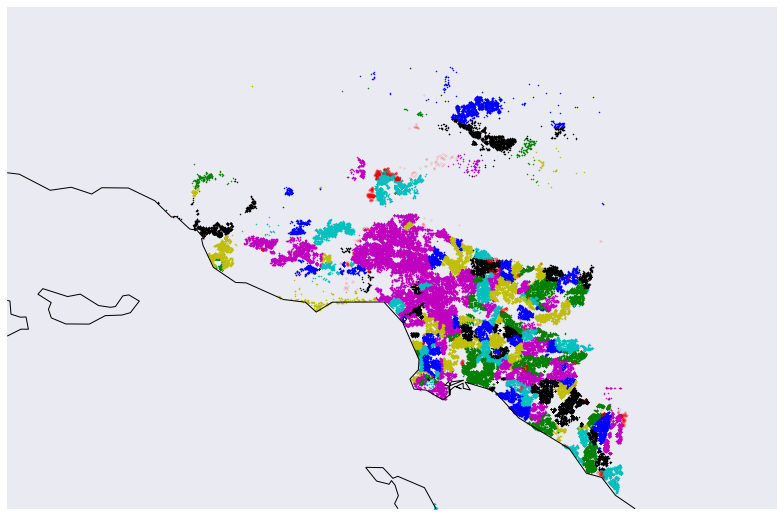

In [32]:
view_missing( train, 'region_city', ignorefirst = False )

1803 missing value at column: region_city


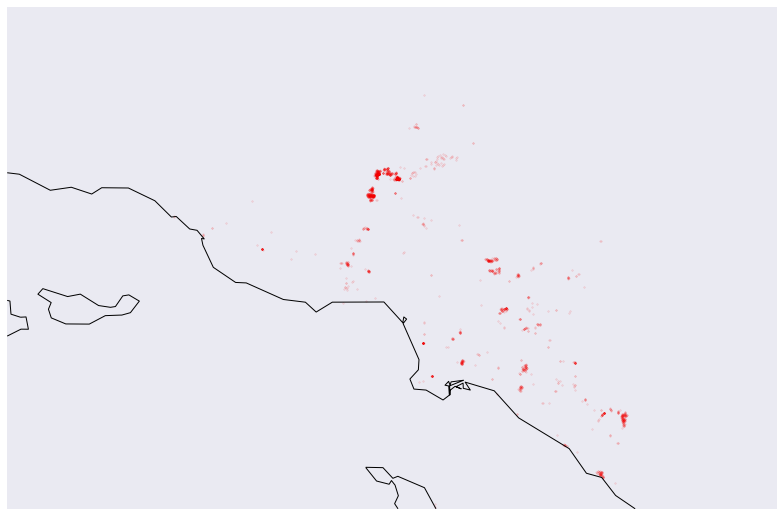

In [31]:
view_missing( train, 'region_city', see_known=False, ignorefirst = False )